In [ ]:
%load_ext sql
%sql sqlite:///lab.db

In [ ]:
!pip install pivottablejs

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
from scipy import stats
from scipy.stats import norm, skew
from scipy.special import boxcox1p
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
from pivottablejs import pivot_ui
import imblearn

In [ ]:
df = pd.read_csv("/content/aug_train.csv", encoding='utf-8')

In [ ]:
df

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0
2,11561,city_21,0.624,Female,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0
3,33241,city_115,0.789,Female,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1
4,666,city_162,0.767,Female,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,NaN,NaN,1,42,1
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,NaN,NaN,4,52,1
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,44,0
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,NaN,<1,500-999,Pvt Ltd,2,97,0


In [ ]:

df.isnull().sum()

,0
enrollee_id,0
city,0
city_development_index,0
gender,4498
relevent_experience,0
enrolled_university,386
education_level,460
major_discipline,2813
experience,65
company_size,5938


In [ ]:
categorical_columns = list(df.select_dtypes(include= ['object']))

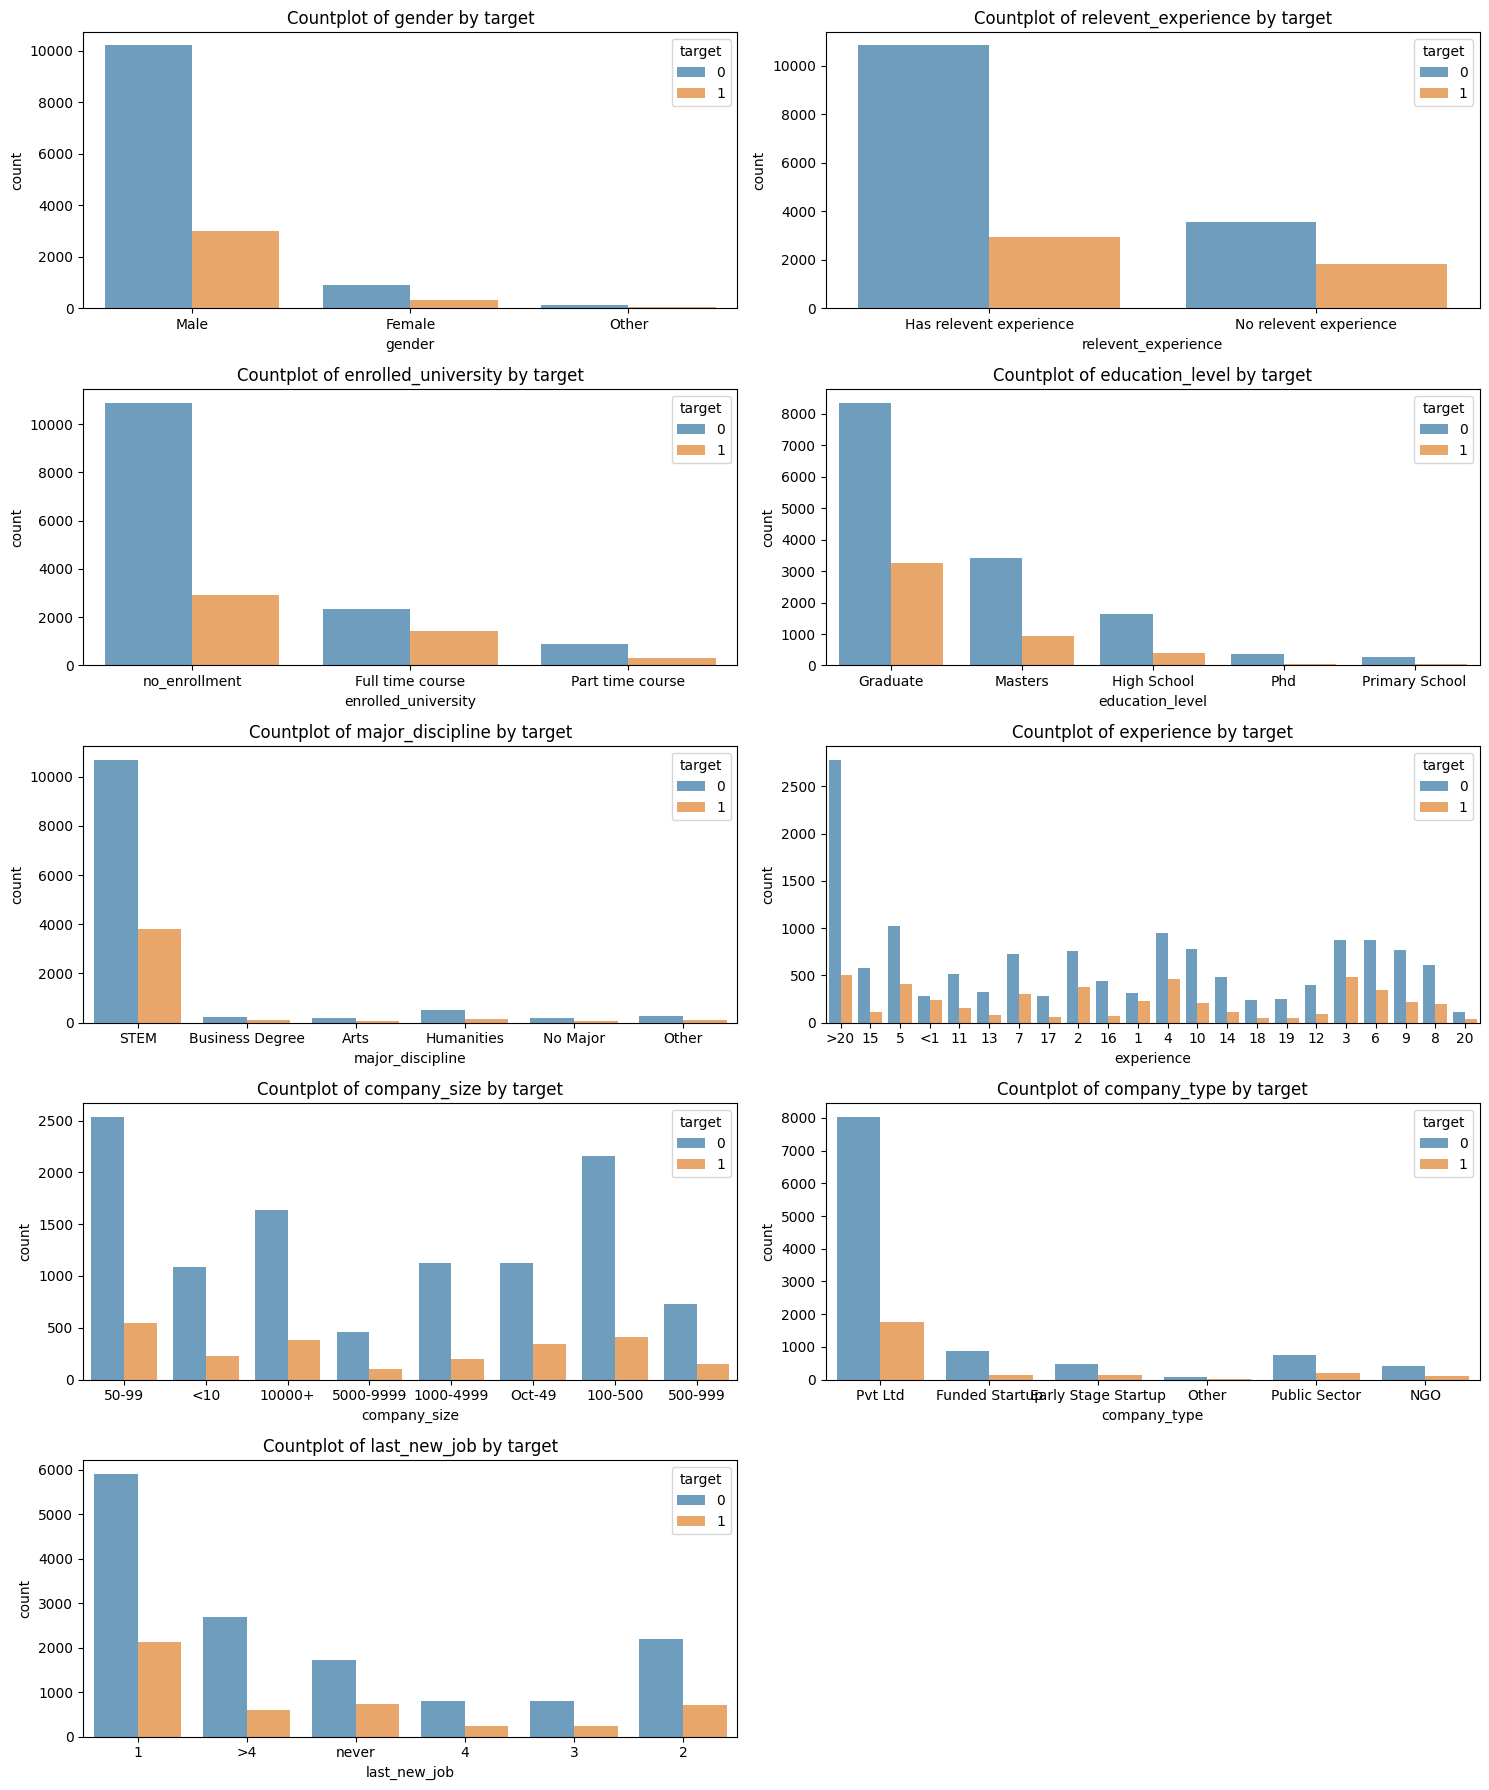

In [ ]:
# Barplots- Checking frequency of the features with respect to the target variable.

plt.figure(figsize=[15,18])

features= ['gender','relevent_experience','enrolled_university', 'education_level','major_discipline','experience',
           'company_size','company_type','last_new_job']

n=1
for f in features:
    plt.subplot(5,2,n) # First figure our numbr of plots in each row, accordingly write the no of rows.
                       # Here, 5 rows, 2 plots in each row, n represents the index of the subplot, which is updated in
                       # each iteration.

    sns.countplot(x=f, hue='target', alpha=0.7, data=df)
   # We are using seaborn's countplot() function to create a countplot, the 'x' parameter is set to the current feature 'f'
    # to plot the distribution. The 'hue' parameter is set to 'target' to distinguish the count of categories based on the
    # target variable. The 'alpha' parameter controls the transperency of the bars making them slightly transparent for
    # better visualization.

    plt.title('Countplot of {} by target'.format(f))

    # This line sets the title of the subplot indicating the feature name and it's distribution with respect to the target
    # variable.

    n= n+1

plt.tight_layout() # Ensures that the plots are properly arranged within the figure without any overlapping.

plt.show()

In [ ]:
# Pivot Table: Average Training Hours per Education Level
pivot1 = df.pivot_table(values="training_hours", index="education_level", aggfunc="mean")

In [ ]:
# Pivot Table: Count of Candidates by Experience and Target p
pivot2 = df.pivot_table(values="enrollee_id", index="experience", columns="target", aggfunc="count")

In [ ]:
# Pivot Table: Count by Gender and Company Type
pivot3 = df.pivot_table(values="enrollee_id", index="gender", columns="company_type", aggfunc="count")

In [ ]:
pivot1


,training_hours
education_level,
Graduate,65.773409
High School,66.680714
Masters,63.270809
Phd,67.524155
Primary School,63.626623


In [ ]:
pivot2

target,0,1
experience,,
1,316,233
10,778,207
11,513,151
12,402,92
13,322,77
14,479,107
15,572,114
16,436,72
17,285,57


In [ ]:
pivot3

company_type,Early Stage Startup,Funded Startup,NGO,Other,Public Sector,Pvt Ltd
gender,,,,,,
Female,41,94,54,12,97,590
Male,387,740,346,79,610,7064
Other,3,12,4,1,9,79


In [ ]:
#pivot table reshapes the data for better. analysis to convert long format data ino a more readable and structured wide format to make it easier o compar multipel variabels acoss categories,
#it organizes the data by unique categoris  without needlign loops or complex logic and helps
#to extract meanignful isnights fom large datases therey simplifying data extraction and makign it easier
#to plot treds using visualization libraries and reduces the need for manual filtering and grouping-- it can also be combined
#with group data to perform aggregagtions like sum, mean , count, etc. to analyze relationships across diff categories
#pivot table is doing a summarization

In [ ]:
# We are defining a function as piechart by giving respective input data.
# Apart from doing loop as above, we can create a function to show the plots.

def pie_chart(data,col): # Creating a function with name as 'pie_chart' byb giving the parameters as name of the dataset and
                         # name of the column
    targets = list(data[col].value_counts().index) # This line gets the unique categories (targets) from the specified
                                                   # column of the dataframe and stores them in the 'targets' list.

    values = list((data[col].value_counts()*100/len(data[col])).values) # Calculates the percentage of occurances for
                                            # each category in the specified column and stores them in the 'values' list.

    # This line creates the pie chart using 'plotly.express' (px.pie) for dynamic visualization of piecharts.
    # The 'values' parameter specifies the percentage values for each category, the 'names' parameter specifies the
    # category labels (targets). And the 'color_discrete_sequence' prameter sets the colours for the pie slices.
    # 'title' parameter sets the title of the piechart to the name of the column.
    # discrete-main colours

    fig = px.pie(values=values, names=targets,color_discrete_sequence=['darkcyan', 'lawngreen'],title=col)

    # This line creates the pie chart using 'plotly.express' (px.pie) for dynamic visualization of piecharts.
    # The 'values' parameter specifies the percentage values for each category, the 'names' parameter specifies the
    # category labels (targets). And the 'color_discrete_sequence' prameter sets the colours for the pie slices.
    # 'title' parameter sets the title of the piechart to the name of the column.
    # discrete-main colours

    fig.show()

In [ ]:
categorical_columns

['city',
 'gender',
 'relevent_experience',
 'enrolled_university',
 'education_level',
 'major_discipline',
 'experience',
 'company_size',
 'company_type',
 'last_new_job']

In [ ]:
pie_chart(df,'gender')

In [ ]:
pie_chart(df,'enrolled_university')

In [ ]:
pie_chart(df,'relevent_experience')

In [ ]:
pie_chart(df,'education_level')

In [ ]:
pie_chart(df,'major_discipline')

In [ ]:
pie_chart(df,'experience')

In [ ]:
 pie_chart(df,'company_size')

In [ ]:
 pie_chart(df,'company_type')

In [ ]:
pie_chart(df,'last_new_job')

In [ ]:
numeric_columns = list(df.select_dtypes(exclude= ['object']))

In [ ]:
numeric_columns

['enrollee_id', 'city_development_index', 'training_hours', 'target']

<Axes: xlabel='major_discipline,education_level'>

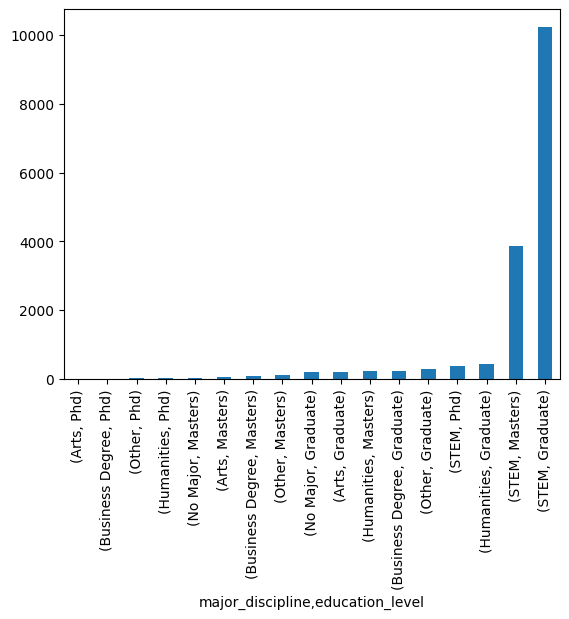

In [ ]:
df[['major_discipline', 'education_level']].value_counts().sort_values().plot(kind='bar')

In [ ]:
#filter ou the data and find to extract those who are STEM graduates only
df[(df.major_discipline == 'STEM') & (df.education_level == 'Graduate')].shape

(10244, 14)

In [ ]:
df[(df.major_discipline == 'STEM') & (df.education_level == 'Masters')].shape

(3873, 14)

<ipython-input-32-2bfad310ec8a>:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='training_hours', ylabel='Density'>

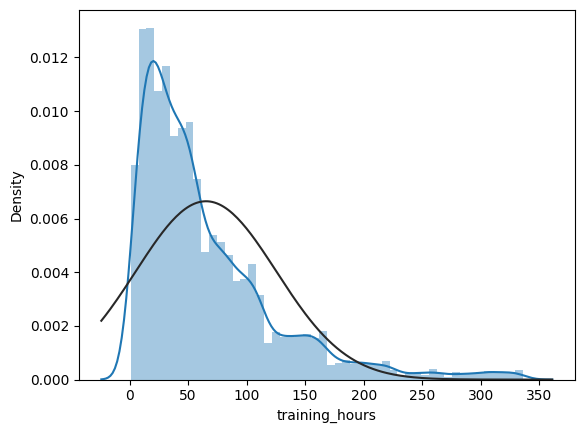

In [ ]:
sns.distplot(df['training_hours'], fit=norm) # normal fit

In [ ]:
# We are seeing the distribution of training_hours to understand whether it is predominant in the lesser side or more side.

# Conclusion: Training_hours is predominant in the lesser side, which means most of the companies are not giving more training,
# and they should try to increase it.
#has a right longer tail, so is therefore positively skewed

In [ ]:
df.gender=df.gender.fillna('Male') # Because male category was predominant when we checked value_counts for gender.

In [ ]:
df.enrolled_university=df.enrolled_university.fillna('no_enrollment')

# Because no_enrollment category was predominant when we checked value_counts for this.

In [ ]:
# We can fill the 'education_level' with mode also, however we are trying to fill it with forward or backward filling.

df.education_level=df.education_level.fillna(method='ffill')

<ipython-input-36-f9e8d194063e>:3: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



In [ ]:
df.major_discipline=df.major_discipline.fillna('STEM')

In [ ]:
df.experience=df.experience.fillna(method='ffill')
#forward fill  is a method to fill missing values in the dataset by propogating the last known value forward until a new nonmisisng value appears

<ipython-input-38-0037e0ef1609>:1: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



In [ ]:
#sample data with how forward fill fill works
df1 = pd.DataFrame({ 'id': [1, 2, 3, 4, 5, 6], 'value': [10, None, None, 20, None, 30] })

In [ ]:
df1['value'] = df1['value'].ffill()

In [ ]:
#Forward Fill for Multiple Columns
#-If you have multiple columns with missing values:

In [ ]:
df1.ffill(inplace=True)

In [ ]:
df1

,id,value
0,1,10.0
1,2,10.0
2,3,10.0
3,4,20.0
4,5,20.0
5,6,30.0


In [ ]:
#applying backward fill now


In [ ]:
df2 = pd.DataFrame({ 'id': [1, 2, 3, 4, 5, 6], 'value': [10, None, None, 20, None, 30] })

In [ ]:
df2['value'] = df2['value'].bfill()

In [ ]:
#Backward Fill for Multiple Columns

In [ ]:
df2.bfill(inplace=True)

In [ ]:
df2

,id,value
0,1,10.0
1,2,20.0
2,3,20.0
3,4,20.0
4,5,30.0
5,6,30.0


In [ ]:
df.company_size=df.company_size.fillna(method='bfill')

<ipython-input-50-27dbd20859c8>:1: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



In [ ]:
df.company_type=df.company_type.fillna('Pvt Ltd')

In [ ]:
df.last_new_job=df.last_new_job.fillna(method='bfill')

<ipython-input-52-deee54fb3c43>:1: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



In [ ]:
#adding visualizations for EDA
import plotly.express as px

In [ ]:
#Treemap (City vs. Company Type)
#for hierarchichal relationships
fig = px.treemap(df, path=['city', 'company_type'], values='training_hours',
                 color='city_development_index', title="Treemap of Training Hours by City & Company Type")
fig.show()

In [ ]:
#Bubble Chart (Experience vs. Training Hours)
#3d scaer plot
#when hover over polot shows dynamic data due to plotly
fig = px.scatter(df, x="experience", y="training_hours", size="city_development_index",
                 color="target", hover_data=['enrollee_id'], title="Bubble Chart of Experience vs Training Hours")
fig.show()

In [ ]:
#Sunburst Chart (Education & Major Discipline)
#sunburtst is plotting for hierahcical relationships
fig = px.sunburst(df, path=['education_level', 'major_discipline'], values='training_hours',
                  color='target', title="Sunburst Chart of Education Level and Major Discipline")
fig.show()

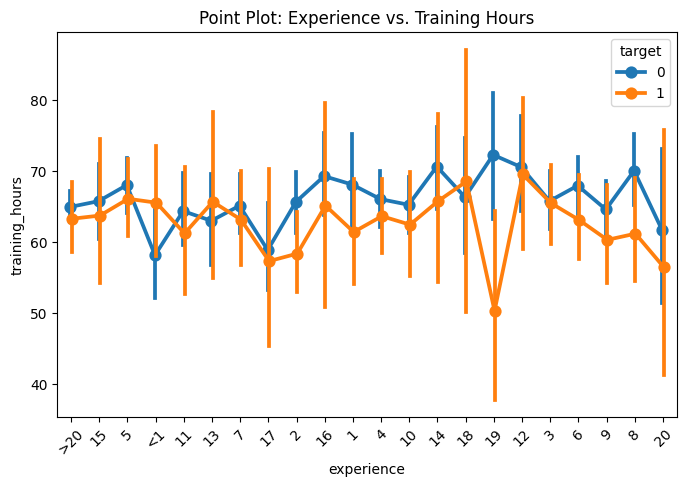

In [ ]:
#Point Plot (Experience vs. Training Hours)
#for target 0 and target 1 we have different classes/patterns
#this point plot tells us the different patterns for atarget 0 and targe 1 iwith respect to traingin hours and expereince
plt.figure(figsize=(8, 5))
sns.pointplot(data=df, x='experience', y='training_hours', hue='target', dodge=True)
plt.title("Point Plot: Experience vs. Training Hours")
plt.xticks(rotation=45)
plt.show()

<ipython-input-60-47b704a07b71>:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




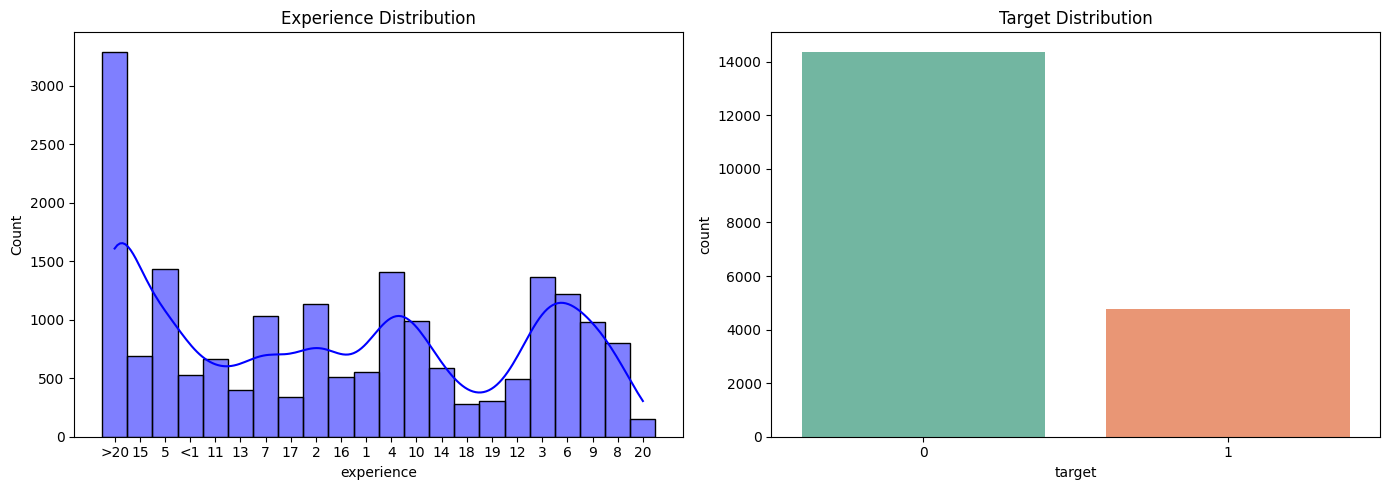

In [ ]:
#Subplot (Experience & Target)
fig, axes = plt.subplots(1, 2, figsize=(14, 5)) #twoplots in one figure

# Histogram of Experience
sns.histplot(df['experience'], kde=True, ax=axes[0], bins=20, color='blue')
axes[0].set_title("Experience Distribution")

# Countplot of Target Variable
sns.countplot(data=df, x="target", ax=axes[1], palette="Set2")
axes[1].set_title("Target Distribution")

plt.tight_layout()
plt.show()

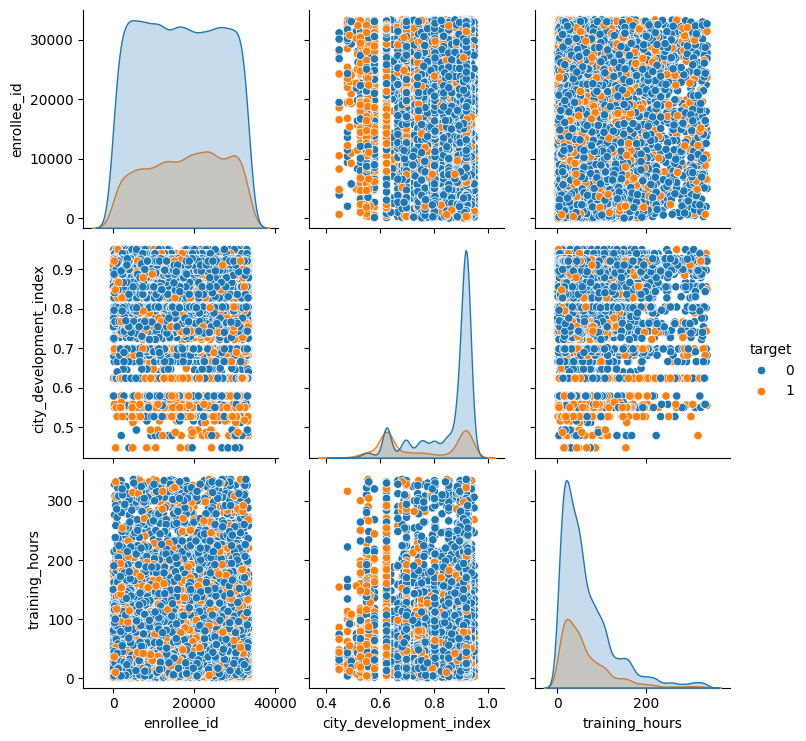

In [ ]:
#pairplot
sns.pairplot(df, hue="target", diag_kind="kde")
plt.show() #pairplot-to check interrelationship of multiple features wrt target

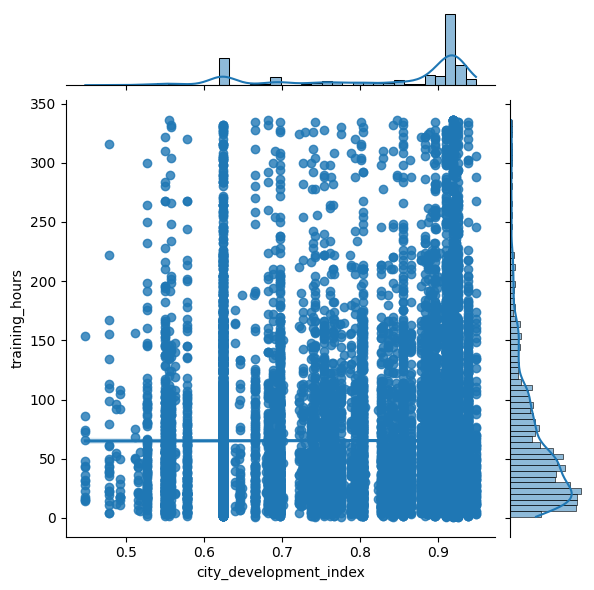

In [ ]:
sns.jointplot(data=df, x="city_development_index", y="training_hours", kind="reg")
plt.show()

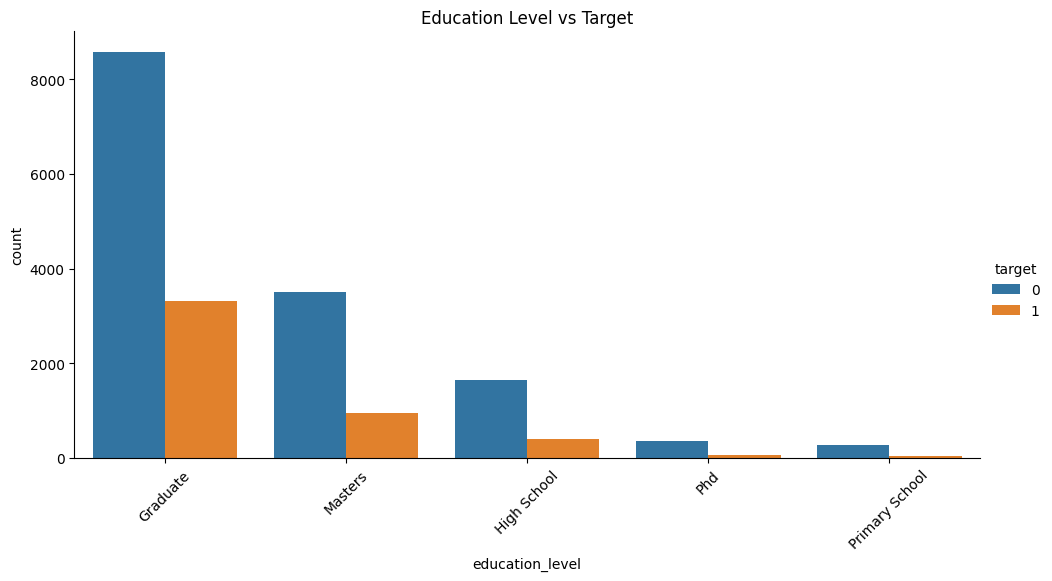

In [ ]:
sns.catplot(data=df, x="education_level", hue="target", kind="count", aspect=2)
plt.title("Education Level vs Target")
plt.xticks(rotation=45)
plt.show()

In [ ]:
#Treemap → Shows hierarchical relationships

In [ ]:
#Bubble Chart → Experience vs. Training Hours with bubble size as City Dev Index.

In [ ]:
#Sunburst → Visualizes hierarchical data (Education → Major Discipline).

In [ ]:
#Point Plot → Relationship between Experience and Training Hours.
#Subplots → Display different visualizations in a single figure.
#Heatmap → Correlation between numerical variables.
#Pairplot → Relationships between numerical features.
 #Jointplot → Regression and density visualization.
#Catplot → Shows category-wise counts.

In [ ]:
le = LabelEncoder()# Created instance for Label encoding.

In [ ]:
df.gender=le.fit_transform(df['gender'])

# Applied .fit_transform() with the saved instance 'le' on extracted column 'gender' from dataset 'df'

In [ ]:
df.relevent_experience=le.fit_transform(df['relevent_experience'])

In [ ]:
df.enrolled_university=le.fit_transform(df['enrolled_university'])

In [ ]:
df.major_discipline=le.fit_transform(df['major_discipline'])

In [ ]:
df.company_type=le.fit_transform(df['company_type'])

In [ ]:
# education_level-Ordinal encoding

In [ ]:
ordinal_education_level = {'Primary School': 0, 'High School': 1, 'Graduate': 2, 'Masters': 3, 'Phd':4}

# Created the instance 'ordinal_education_level' with the respective mappings for applying Ordinal Encoding.
# There is no specific function for ordinal encoding like label encoding.

In [ ]:
df.education_level=df.education_level.map(ordinal_education_level)

In [ ]:
ordinal_experience= {'<1': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': 8, '9': 9, '10': 10,
                    '11': 11, '12': 12, '13': 13, '14': 14, '15': 15, '16': 16, '17': 17, '18': 18, '19': 19, '20': 20,
                    '>20': 21}

In [ ]:
df.experience=df.experience.map(ordinal_experience)

In [ ]:
# company_size-ordinal encoding

df.company_size.value_counts()


,count
company_size,
50-99,4457
100-500,3733
10000+,2880
Oct-49,2153
1000-4999,1940
<10,1930
500-999,1252
5000-9999,812


In [ ]:
ordinal_company_size = {'<10':0, 'Oct-49':1, '50-99':2, '100-500':3,
                        '500-999':4, '1000-4999':5, '5000-9999':6, '10000+':7}

In [ ]:
df.company_size = df.company_size.map(ordinal_company_size)

In [ ]:
# last_new_job-ordinal encoding

df.last_new_job.value_counts()

,count
last_new_job,
1,8228
>4,3359
2,2967
never,2505
3,1050
4,1049


In [ ]:
ordinal_last_new_job = {'never':0, '1':1, '2':2, '3':3, '4':4, '>4':5}

In [ ]:
df.last_new_job = df.last_new_job.map(ordinal_last_new_job)

In [ ]:
# Drop enrolee_id since it is not impacting the target variable

df.drop('enrollee_id', axis=1, inplace=True)

In [ ]:
df.city = df.city.apply(lambda x: int(x.split('_')[1]))

# We are using a 'lambda' function along with the 'apply()'  function to extract the numerical value from the 'city' column
# in our dataframe 'df'. It assumes that the 'city' column contains strings in the format 'city_xxx' where 'xxx' is the numeric
# value that we want to extract. So we are applying the 'lambda' function that takes each element 'x' in the 'city' column,
# splits it using the '_' as seperator, and then extracts the second element (index 1) from the split parts.

# Finally, it converts the extracted value to an integer using 'int()'. After applying the 'lambda' function, the expression
# represents the 'city' column with the extracted numerical values.

In [ ]:
df

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,103,0.920,1,0,2,2,5,21,2.0,5,1,36,1
1,40,0.776,1,1,2,2,5,15,2.0,5,5,47,0
2,21,0.624,0,1,0,2,5,5,2.0,5,0,83,0
3,115,0.789,0,1,2,2,1,0,2.0,5,0,52,1
4,162,0.767,0,0,2,3,5,21,2.0,1,4,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,173,0.878,1,1,2,2,2,14,2.0,5,1,42,1
19154,103,0.920,1,0,2,2,5,14,2.0,5,4,52,1
19155,103,0.920,1,0,2,2,5,21,2.0,5,4,44,0
19156,65,0.802,1,0,2,1,5,0,4.0,5,2,97,0


In [ ]:
df.dropna(inplace=True)

In [ ]:
# Feature scaling of 'df'

# Dividing the data set in x and y

y = df.target.values
x = df.drop(['target'], axis = 1)

In [ ]:
df

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,103,0.920,1,0,2,2,5,21,2.0,5,1,36,1
1,40,0.776,1,1,2,2,5,15,2.0,5,5,47,0
2,21,0.624,0,1,0,2,5,5,2.0,5,0,83,0
3,115,0.789,0,1,2,2,1,0,2.0,5,0,52,1
4,162,0.767,0,0,2,3,5,21,2.0,1,4,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19152,103,0.920,0,0,2,2,2,7,1.0,1,1,25,0
19153,173,0.878,1,1,2,2,2,14,2.0,5,1,42,1
19154,103,0.920,1,0,2,2,5,14,2.0,5,4,52,1
19155,103,0.920,1,0,2,2,5,21,2.0,5,4,44,0


In [ ]:
 # Normalization

#if isinstance(x_data, pd.Series):
#    x = (x_data - x_data.min()) / (x_data.max() - x_data.min())
#else:
#    pass
x = (x - x.min()) / (x.max() - x.min())

In [ ]:
# Balancing

df.target.value_counts()

,count
target,
0,14380
1,4777


<Axes: xlabel='target', ylabel='count'>

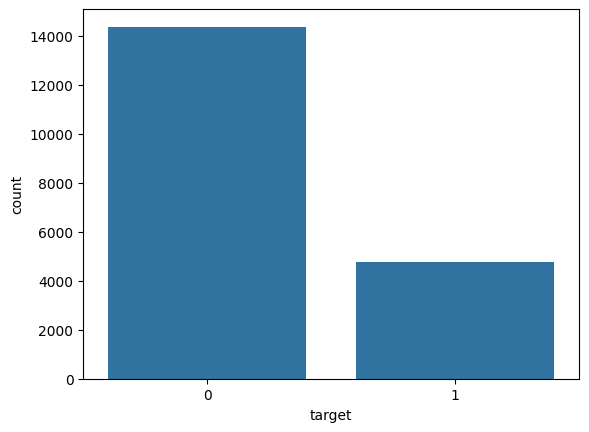

In [ ]:
sns.countplot(x='target', data=df)

# This is imbalance dataset. We will have to resolve this problem by balancing the dataset with the help of up sampling
# (i.e. increasing the lesser class) or down sampling (i.e. decreasing the greater class) to make the classes more or less
# equivalent.

In [ ]:
from imblearn.over_sampling import SMOTE #generating synthetic samples of the minority class

#from imblearn.under_sampling import RandomUnderSampler

from imblearn.pipeline import Pipeline
from collections import Counter

In [ ]:
num_before = dict(Counter(y))

# Calculates the count of each class in the original target variable 'y', using the 'Counter' class from the 'collections'
# module. The result is stored in the 'num_vbefore' dictionary where the keys represent the class labels and the values
# represents their corresponding counts.

In [ ]:
smote = SMOTE()

# Saving the instance.
# SMOTE: Synthetic Minority Oversampling Technique.
# SMOTE is a technique used in Machine learning and data pre-processing to address class imbalance in a dataset. Class
# imbalance occurs when one class (the minority class) has significantly fewer samples than the other class (majority class),
# and it can lead to biased models that perform poorly on the monirity class.

# SMOTE works by generating synthetic samples of the minority class to balance the class distribution. It does this by
# interpolating between existing minority class samples to create new synthetic data points. The synthetic samples are added to
# the training data set to increase the representation of the minority class.

In [ ]:
#SMOTE is particularly used in classification tasks where acheiving a balanced class distribution is important.

# Steps how SMOTE works:

# 1. Identify the minority class that you want to oversample.

# 2. Select a sample:
# Select a random sample from the minority class as its nearest neighbour, corresponding to each sample in the
# minority class.

# 3. Create syntheic examples:
# For each selected example (i.e. for each sample) calculate the difference between the feature and it's nearest neighbour.
# Multiply the difference by a random number between 0 and 1, and add to the feature of the selected sample. This creates a
# new synthetic sample.

# 4. Repeat step 2 and 3 until the gap is bridged, or the desired balance is achieved.

# 5. Combine with the original data:
# We will add the synthetic samples to the original dataset creating a new dataset with a balanced distribution.

In [ ]:
x_smote, y_smote = smote.fit_resample(x,y)

# We are applying the SMOTE technique to the feature matrix and the target variable 'y'. It generates synthetic samples for
# the minority class to balance the class distribution. The resulting oversampled feature matrix is stored in 'x_smote' and
# the corresponding target variable is stored in 'y_smote'.

In [ ]:
num_after = dict(Counter(y_smote))

In [ ]:
after_smote=list(num_after.values())

after_smote.reverse()

# We are reversing the order of the elements in the 'after_smote' list. The 'reverse()' method is used to reverse the order
# of the elements in a list in place. The purpose of the reversing of the list is related to how we want to visualize or
# present the class distribution. The reason of reversing the list is likely related to how the classes are ordered in the
# dictionary and how they are expected to be visualized or plotted later in the code.

In [ ]:
after_smote

[14380, 14380]

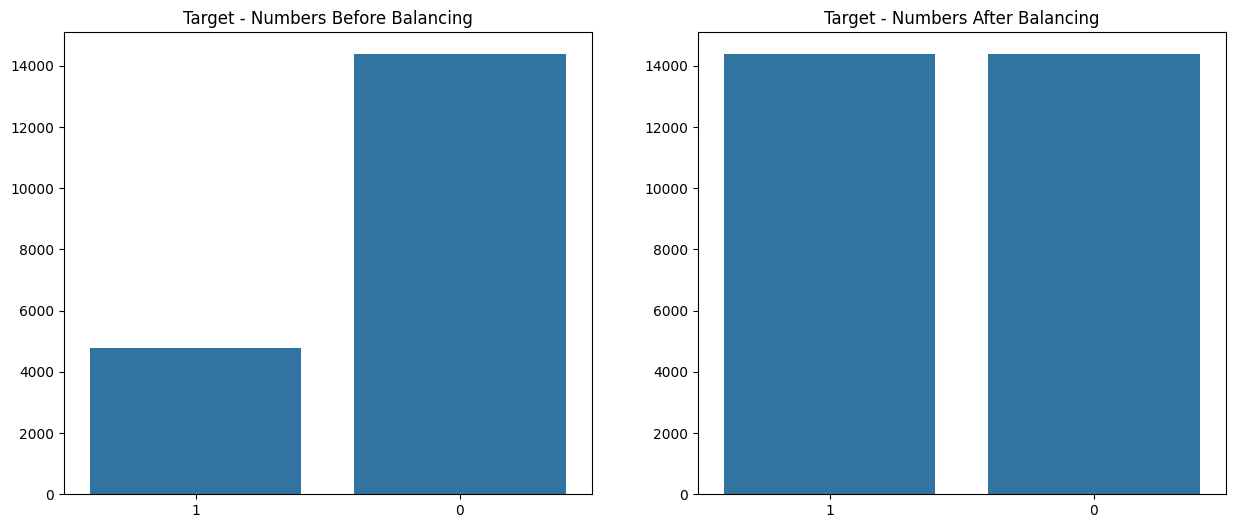

In [ ]:
labels = ["1","0"]

plt.figure(figsize=(15,6))
plt.subplot(1,2,1)

sns.barplot(x=labels, y=list(num_before.values()))

plt.title("Target - Numbers Before Balancing")
plt.subplot(1,2,2)

sns.barplot(x=labels, y=after_smote)

plt.title("Target - Numbers After Balancing")

plt.show()
#if you did nto take synethetic data, you didnt have enough of trainign data to be unbiased so thats why you did balancing

In [ ]:
# Train Test Split
# used balanced aata in train test pslit

x_train, x_test, y_train, y_test = train_test_split(x_smote,y_smote,test_size = 0.25,random_state=0)

In [ ]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((21570, 12), (7190, 12), (21570,), (7190,))

In [ ]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((21570, 12), (7190, 12), (21570,), (7190,))

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
# Create a list of models
#adding all thes emodel resutls in the empty list named models and then
#appending each model to the list
models = []

models.append(('Logistic Regression' ,LogisticRegression(random_state=42)))
models.append(('Naive bayes', GaussianNB()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier(random_state = 42)))
models.append(('Random Forest', RandomForestClassifier(random_state = 42)))
models.append(('SVM', SVC(gamma='auto', random_state = 42)))
models.append(('XGBoost', GradientBoostingClassifier(random_state = 42)))
models.append(('GradientBoosting', GradientBoostingClassifier(random_state = 42)))

results = []

names = []

In [ ]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, precision_score, recall_score, f1_score

In [ ]:
models

[('Logistic Regression', LogisticRegression(random_state=42)),
 ('Naive bayes', GaussianNB()),
 ('KNN', KNeighborsClassifier()),
 ('CART', DecisionTreeClassifier(random_state=42)),
 ('Random Forest', RandomForestClassifier(random_state=42)),
 ('SVM', SVC(gamma='auto', random_state=42)),
 ('XGBoost', GradientBoostingClassifier(random_state=42)),
 ('GradientBoosting', GradientBoostingClassifier(random_state=42))]

In [ ]:
# Fitting all the models and calculate accuracy (doing predictions first) for all the models in a for loop

for name, model in models:
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("{} : {}".format(name,accuracy))
    # can see tha random forest heas best accuracy score, now we have to check
    #whether there is overfitting or underfitting within randomforrest

Logistic Regression : 0.6887343532684284
Naive bayes : 0.6837273991655076
KNN : 0.7606397774687066
CART : 0.7579972183588317
Random Forest : 0.8401947148817802
SVM : 0.6986091794158553
XGBoost : 0.8133518776077886
GradientBoosting : 0.8133518776077886


In [ ]:
# Calculating precision for all models
#Precision measures the proportion of correctly identified positive cases out of all the cases
#predicted as positive by the model. It is calculated as the ratio of true positives to the sum of true
#positives and false positives. Precision provides an indication of the accuracy of the model&#39;s positive
#predictions.
#Precision = True Positives / (True Positives + False Positives)
#if mdoel is bad precision, will be low, the higher the rpecision hte beter for the mdoel

for name, model in models:
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    precision = precision_score(y_test, y_pred)
    print("{} : {}".format(name,precision))

#Random forrest has the highest precision, sothe best model

Logistic Regression : 0.7182235834609495
Naive bayes : 0.6963528413910093
KNN : 0.7221967963386727
CART : 0.7661223360088569
Random Forest : 0.8534870641169854
SVM : 0.7328767123287672
XGBoost : 0.849232621125489
GradientBoosting : 0.849232621125489


In [ ]:
# Calculating recall for all models
#Recall measures the proportion of actual
#positive cases that are correctly identified by the model. It is calculated as the ratio of true positives
#to the sum of true positives and false negatives. A high recall indicates that the model is good at
#identifying positive cases. --> therefor,e the higher the recall, the better for the model
#Recall = True Positives / (True Positives + False Negatives)

for name, model in models:
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    recall = recall_score(y_test, y_pred)
    print("{} : {}".format(name,recall))

#KNN has the highest recall at 87.7% but so does random forrestat 83.8%
#the mdoel with both high precission and recall shoudl be taken, which is Random forrest
#KNN has a much lower precision

Logistic Regression : 0.6401856401856402
Naive bayes : 0.6723996723996724
KNN : 0.8615888615888616
CART : 0.7556647556647557
Random Forest : 0.8285558285558285
SVM : 0.6426426426426426
XGBoost : 0.7704067704067704
GradientBoosting : 0.7704067704067704


In [ ]:
from sklearn.metrics import f1_score

for name, model in models:
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    f1_value = f1_score(y_test, y_pred)
    print(f"{name}: F1 Score = {f1_value:.4f}")

Logistic Regression: F1 Score = 0.6770
Naive bayes: F1 Score = 0.6842
KNN: F1 Score = 0.7858
CART: F1 Score = 0.7609
Random Forest: F1 Score = 0.8408
SVM: F1 Score = 0.6848
XGBoost: F1 Score = 0.8079
GradientBoosting: F1 Score = 0.8079


In [ ]:
# Calculating confusion matrix for all models

for name, model in models:
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    cf = confusion_matrix(y_test, y_pred)
    print("{} : {}".format(name,cf))

#Ranom fores has max true negative at 2986 and oprimized true positive (INN has maxium but much lower true negative)at 3073


Logistic Regression : [[2607  920]
 [1318 2345]]
Naive bayes : [[2453 1074]
 [1200 2463]]
KNN : [[2313 1214]
 [ 507 3156]]
CART : [[2682  845]
 [ 895 2768]]
Random Forest : [[3006  521]
 [ 628 3035]]
SVM : [[2669  858]
 [1309 2354]]
XGBoost : [[3026  501]
 [ 841 2822]]
GradientBoosting : [[3026  501]
 [ 841 2822]]


In [ ]:

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 1000, random_state = 1)

# n_estimators: How many Decision Trees this Random Forest model will include

rf.fit(x_train, y_train)

RandomForestClassifier(n_estimators=1000, random_state=1)

In [ ]:
# Predicting the values after applying model 3- Random Forest model:

from sklearn.ensemble import RandomForestClassifier

# rf = RandomForestClassifier()
# rf.fit(x_train, y_train)

y_pred_rf = rf.predict(x_test)

In [ ]:
rf.score(x_train, y_train)

0.9993509503940659

In [ ]:
rf.score(x_test, y_test)

0.8435326842837274

In [ ]:
# We are building the 'accuracies' data frame to append the accuracies of multiple models that we will be going on adding
# to do cross comparison. This is done to have all the accuracies for all models together.

accuracies = {}

In [ ]:
# Accuracy-Model 3-Random Forest:

acc_rf = accuracy_score(y_test, y_pred_rf)*100

accuracies['Accuracy_Random Forest'] = acc_rf

print("Test Accuracy with Random Forest: {:.2f}%".format(acc_rf))

Test Accuracy with Random Forest: 84.35%


In [ ]:
# Accuracy, Precision and Recall-Model 3-Random Forest:

from sklearn.metrics import accuracy_score, precision_score, recall_score

print("Accuracy (Random Forest):", accuracy_score(y_test, y_pred_rf))
print("Precision (Random Forest):", precision_score(y_test, y_pred_rf))
print("Recall (Random Forest):", recall_score(y_test, y_pred_rf))

# Accuracy: True observation/ Total observation
# Precision = True Positives / (True Positives + False Positives) = True Positive/Predicted Results.
# Recall = True Positives / (True Positives + False Negatives) = True Positive/ Actual Results.

Accuracy (Random Forest): 0.8435326842837274
Precision (Random Forest): 0.8530884808013356
Recall (Random Forest): 0.8370188370188371


In [ ]:
# till now decision tree is best because it has 79% accuracy without overfitting but. random forest doe shave overfitting
#(because train score much higher hna test score )

# Model 4: SVC (Support Vector Classification)

from sklearn.svm import SVC

In [ ]:
svm = SVC(random_state = 1)

svm.fit(x_train, y_train)

SVC(random_state=1)

In [ ]:
# Predicting the values after applying Model 4- SVM:

from sklearn.ensemble import RandomForestClassifier

y_pred_svm = svm.predict(x_test)

In [ ]:
# Accuracy-Model 4-SVM:

acc_svc = accuracy_score(y_test, y_pred_svm)*100

accuracies['Accuracy_SVM'] = acc_svc

In [ ]:
print("Test Accuracy with SVC: {:.2f}%".format(acc_svc))

Test Accuracy with SVC: 70.53%


In [ ]:
# Accuracy, Precision and Recall-Model 4-SVM:

from sklearn.metrics import accuracy_score, precision_score, recall_score

print("Accuracy (SVC):", accuracy_score(y_test, y_pred_svm))
print("Precision (SVC):", precision_score(y_test, y_pred_svm))
print("Recall (SVC):", recall_score(y_test, y_pred_svm))

# Accuracy: True observation/ Total observation
# Precision = True Positives / (True Positives + False Positives) = True Positive/Predicted Results.
# Recall = True Positives / (True Positives + False Negatives) = True Positive/ Actual Results.

Accuracy (SVC): 0.7052851182197497
Precision (SVC): 0.7460165710643722
Recall (SVC): 0.6390936390936391


In [ ]:
#Accuracy ith random forest is maximum as seen now, however there is overfitting so we ill do hyperparamtertuning
#Defining Parameter Grid for GridSearchCV
param_grid = {
    'n_estimators': [2, 3, 4],  # Number of trees
    #'max_depth': [5, 10, 20, None],  # Maximum depth of each tree
    #'min_samples_split': [2, 5, 10],  # Min samples required to split a node
    #'min_samples_leaf': [1, 2, 4],  # Min samples required at each leaf node
    #'criterion': ['gini', 'entropy']  # Splitting criterion
}
#hyperpatemtr tuning --> tunign the paramters to forecebaly stop learning beyond a point to reduce the sepcifc gpa between
#train and test scores, to add robustness of the model performance


In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'n_estimators': [2, 3, 4]}, scoring='accuracy',
             verbose=1)

In [ ]:
#Best Model & Hyperparameters
print(f"Best Parameters: {grid_search.best_params_}")
best_model = grid_search.best_estimator_

Best Parameters: {'n_estimators': 4}


In [ ]:
#Model Evaluation
y_pred = best_model.predict(x_test)

In [ ]:
print("\n🔹 Accuracy:", accuracy_score(y_test, y_pred))
print("\n🔹 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n🔹 Classification Report:\n", classification_report(y_test, y_pred))


🔹 Accuracy: 0.7783031988873436

🔹 Confusion Matrix:
 [[3030  497]
 [1097 2566]]

🔹 Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.86      0.79      3527
           1       0.84      0.70      0.76      3663

    accuracy                           0.78      7190
   macro avg       0.79      0.78      0.78      7190
weighted avg       0.79      0.78      0.78      7190



In [ ]:
grid_search.score(x_train, y_train) #because there is overfititng go ahead with gradient_boost which is he second best accuracy score --> must try gradient with smaller numbers first

0.9577190542420028

In [ ]:
grid_search.score(x_test, y_test)

0.7783031988873436

In [ ]:
# Feature Importance

importances = rf.feature_importances_

features = df.columns[:12] # It will take all the rows and 0 to 11 column
features

Index(['city', 'city_development_index', 'gender', 'relevent_experience',
       'enrolled_university', 'education_level', 'major_discipline',
       'experience', 'company_size', 'company_type', 'last_new_job',
       'training_hours'],
      dtype='object')

In [ ]:
imp = pd.DataFrame({'Features': features, 'Importance': importances}) # Create a DataFrame with feature names and importances
imp['Sum Importance'] = imp['Importance'].cumsum() # Calculate the cumulative sum of importances
imp = imp.sort_values(by = 'Importance') # Sort the DataFrame by importance (ascending order)
imp

,Features,Importance,Sum Importance
2,gender,0.015578,0.318920
6,major_discipline,0.021655,0.461104
3,relevent_experience,0.024016,0.342936
4,enrolled_university,0.029685,0.372620
9,company_type,0.035037,0.741948
5,education_level,0.066829,0.439449
10,last_new_job,0.076035,0.817983
8,company_size,0.102498,0.706911
0,city,0.116225,0.116225
7,experience,0.143308,0.604413


In [ ]:
plt.figure(figsize=(12,8)) #Sets the size of the figure (plot)


<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

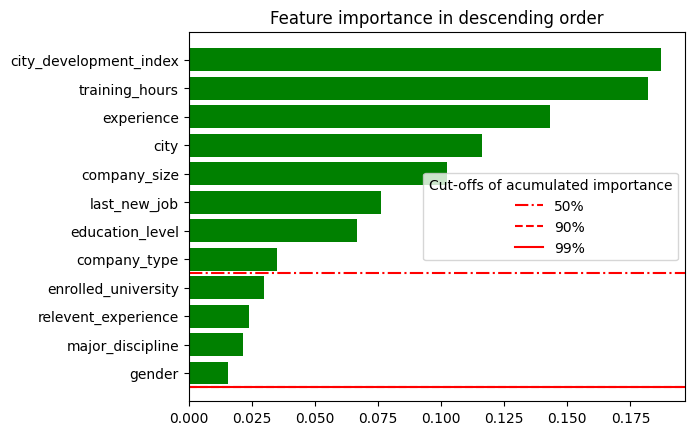

In [ ]:
plt.barh(imp['Features'], imp['Importance'], color = 'g') #Creates a horizontal bar chart where feature names are on the y-axis (imp['Features']), and feature importances are on the x-axis (imp['Importance']). The bars are colored green ('g').
l1 = plt.axhline(len(imp) - (len(imp['Features'][imp['Sum Importance'] < 0.50]) + 1.5), linestyle='-.', color = 'r')
l2 = plt.axhline(len(imp) - (len(imp['Features'][imp['Sum Importance'] < 0.90]) + 1.5), linestyle='--', color = 'r')
l3 = plt.axhline(len(imp) - (len(imp['Features'][imp['Sum Importance'] < 0.99]) + 1.5), linestyle='-', color = 'r')
plt.legend(title = 'Cut-offs of acumulated importance', handles=(l1, l2, l3), labels = ('50%', '90%', '99%')) #Adds a legend to the plot, explaining the significance of the horizontal lines (cumulative importance thresholds).
plt.title('Feature importance in descending order') #Sets the title of the plot.
plt.show()
#We generated a bar chart with horizantal lines, represnting the cumaltive importance thresholds making it easier
#to iterpreate the relative performance of each feature in the model